### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression
from math import sqrt

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Reading

In [3]:
df=pd.read_csv(r'C:\Users\Admin\CD Project\Data.csv',encoding = 'latin',header=None,names=['target','id','time','query','user','tweet'])

In [4]:
df.columns

Index(['target', 'id', 'time', 'query', 'user', 'tweet'], dtype='object')

In [5]:
df.head()

,target,id,time,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


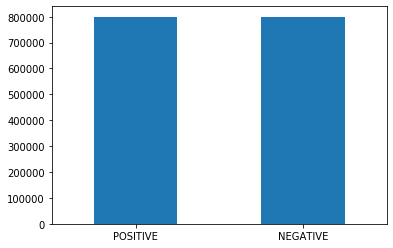

In [11]:
mapping = {0: "NEGATIVE",4: "POSITIVE"}
def sentiment(label):
    return mapping[int(label)]
df.target = df.target.apply(lambda x: sentiment(x))
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [12]:
import re
def preprocess_tweet(tweet):
    tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    tweet = re.sub('@[^\s]+','AT_USER', tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    return tweet

In [13]:
df['tweet'] = df['tweet'].apply(preprocess_tweet)

In [14]:
df['tweet']

0          AT_USER URL - Awww, that's a bummer. You shoul...
1          is upset that he can't update his Facebook by ...
2          AT_USER I dived many times for the ball. Manag...
3            my whole body feels itchy and like its on fire 
4          AT_USER no, it's not behaving at all. i'm mad....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999        happy charitytuesday AT_USER AT_USER AT_USER 
Name: tweet, Length: 1600000, dtype: object

In [15]:
stopwords=['ill', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves']